In [ ]:
import numpy as np # linear algebra
import pandas as pd
from xgboost import plot_importance, plot_tree
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(20,10) # for graphs styling
plt.style.use('tableau-colorblind10')

In [ ]:
df = pd.read_csv('Gold Price.csv')

In [ ]:
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,01-01-2014,29542,29435,29598,29340,2930,0.25
1,02-01-2014,29975,29678,30050,29678,3140,1.47
2,03-01-2014,29727,30031,30125,29539,3050,-0.83
3,04-01-2014,29279,29279,29279,29279,0,-1.51
4,06-01-2014,29119,29300,29395,29051,24380,-0.55


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['hour'] = df['Date'].dt.hour
df['dayofweek'] = df['Date'].dt.dayofweek
df['quarter'] = df['Date'].dt.quarter
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayofyear'] = df['Date'].dt.dayofyear
df['sin_day'] = np.sin(df['dayofyear'])
df['cos_day'] = np.cos(df['dayofyear'])
df['dayofmonth'] = df['Date'].dt.day
df['weekofyear'] = df['Date'].dt.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df.head(5)

,Date,Price,Open,High,Low,Volume,Chg%,hour,dayofweek,quarter,month,year,dayofyear,sin_day,cos_day,dayofmonth,weekofyear
0,2014-01-01,29542,29435,29598,29340,2930,0.25,0,2,1,1,2014,1,0.841471,0.540302,1,1
1,2014-02-01,29975,29678,30050,29678,3140,1.47,0,5,1,2,2014,32,0.551427,0.834223,1,5
2,2014-03-01,29727,30031,30125,29539,3050,-0.83,0,5,1,3,2014,60,-0.304811,-0.952413,1,9
3,2014-04-01,29279,29279,29279,29279,0,-1.51,0,1,2,4,2014,91,0.105988,-0.994367,1,14
4,2014-06-01,29119,29300,29395,29051,24380,-0.55,0,6,2,6,2014,152,0.933321,0.359044,1,22


In [ ]:
df=df.drop(['Date','Chg%'],axis=1)

In [ ]:
df.head(5)

,Price,Open,High,Low,Volume,hour,dayofweek,quarter,month,year,dayofyear,sin_day,cos_day,dayofmonth,weekofyear
0,29542,29435,29598,29340,2930,0,2,1,1,2014,1,0.841471,0.540302,1,1
1,29975,29678,30050,29678,3140,0,5,1,2,2014,32,0.551427,0.834223,1,5
2,29727,30031,30125,29539,3050,0,5,1,3,2014,60,-0.304811,-0.952413,1,9
3,29279,29279,29279,29279,0,0,1,2,4,2014,91,0.105988,-0.994367,1,14
4,29119,29300,29395,29051,24380,0,6,2,6,2014,152,0.933321,0.359044,1,22


In [ ]:
len(df)

2072

In [ ]:
df_train=df[df['year']<2017]
X_train=df_train.drop(['Price'],axis=1)
y_train=df_train['Price']

In [ ]:
df_test=df[df['year']>=2017]
X_test=df_test.drop(['Price'],axis=1)
y_test=df_test['Price']

In [ ]:
df_test.head(5)

,Price,Open,High,Low,Volume,hour,dayofweek,quarter,month,year,dayofyear,sin_day,cos_day,dayofmonth,weekofyear
789,27828,27673,27860,27670,1430,0,2,1,2,2017,32,0.551427,0.834223,1,5
790,28102,27860,28134,27770,960,0,2,1,3,2017,60,-0.304811,-0.952413,1,9
791,28085,28080,28158,27987,720,0,5,2,4,2017,91,0.105988,-0.994367,1,13
792,28890,28269,28925,28183,230,0,0,2,5,2017,121,0.998815,-0.048664,1,18
793,27960,28001,28099,27870,12120,0,3,2,6,2017,152,0.933321,0.359044,1,22


In [ ]:
X_train.shape,X_test.shape

((789, 14), (1283, 14))

In [ ]:
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg.fit(X_train, y_train,
        verbose=False)  # Change verbose to True if you want to see it train
yhat = reg.predict(X_test)

In [ ]:
yhat

array([27703.95 , 27964.27 , 28131.475, ..., 32078.873, 32048.709,
       32013.13 ], dtype=float32)

In [ ]:
y_test

789     27828
790     28102
791     28085
792     28890
793     27960
        ...  
2067    48012
2068    47982
2069    47933
2070    47888
2071    47515
Name: Price, Length: 1283, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, yhat))
print("RMSE : % f" %(rmse))

RMSE :  10159.076946


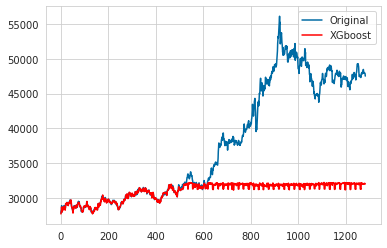

In [ ]:
plt.plot(y_test.values, label='Original')
plt.plot(yhat, color='red', label='XGboost')
plt.legend()

In [ ]:
params = {
    'min_child_weight': [4, 5],
    'gamma': [i / 10.0 for i in range(3, 6)],
    'subsample': [i / 10.0 for i in range(6, 11)],
    'colsample_bytree': [i / 10.0 for i in range(6, 11)],
    'max_depth': [2, 3, 4]
}
# Initialize XGB and GridSearch
xgb_reg = xgb.XGBRegressor(nthread=-1, objective='reg:squarederror')
grid = GridSearchCV(xgb_reg, params)
grid.fit(X_train, y_train)
gridcv_xgb = grid.best_estimator_
print(r2_score(y_test, gridcv_xgb.predict(X_test)))

-0.5009901800364507


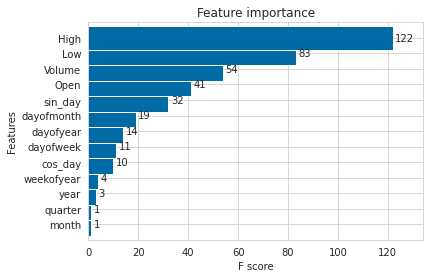

In [ ]:
_ = plot_importance(gridcv_xgb, height=1.5)

In [ ]:
gridcv_xgb

XGBRegressor(colsample_bytree=0.8, gamma=0.3, min_child_weight=4, nthread=-1,
             objective='reg:squarederror', subsample=0.7)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, yhat))
print("RMSE : % f" %(rmse))

RMSE :  10159.076946


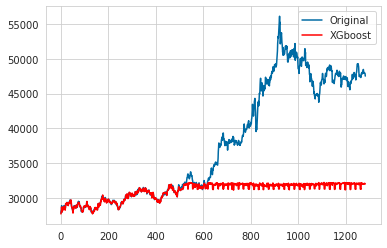

In [ ]:
plt.plot(y_test.values, label='Original')
plt.plot(yhat, color='red', label='XGboost')
plt.legend()

FB Profet

In [ ]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('Gold Price.csv')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-02-01,29975,29678,30050,29678,3140,1.47
2,2014-03-01,29727,30031,30125,29539,3050,-0.83
3,2014-04-01,29279,29279,29279,29279,0,-1.51
4,2014-06-01,29119,29300,29395,29051,24380,-0.55


In [ ]:
df_train.shape, df_test.shape

((789, 15), (1283, 15))

In [ ]:
df_train=df[:789]
df_test=df[789:]

In [ ]:
df_train = df_train.rename(columns={'Price': 'y', 'Date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])


model = Prophet() #instantiate Prophet
model.add_regressor('Open')
model.add_regressor('High')

In [ ]:
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df_test = df_test.rename(columns={'Price': 'y', 'Date':'ds'})
df_test.columns

Index(['ds', 'y', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [ ]:
future_data=df_test[['ds', 'Open', 'High']]

In [ ]:
future_data.head(5)

,ds,Open,High
789,2017-02-01,27673,27860
790,2017-03-01,27860,28134
791,2017-04-01,28080,28158
792,2017-05-01,28269,28925
793,2017-06-01,28001,28099


In [ ]:
forecast_data = model.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1273,2021-12-16,11.009144,10.555536,11.453235
1274,2021-12-17,11.017746,10.563172,11.458328
1275,2021-12-20,11.014121,10.551817,11.455161
1276,2021-12-21,11.002816,10.548561,11.447242
1277,2021-12-22,10.998112,10.538390,11.442052
1278,2021-12-23,11.001669,10.541265,11.446957
1279,2021-12-24,11.000740,10.541585,11.445729
1280,2021-12-27,11.000199,10.544186,11.444889
1281,2021-12-28,11.000611,10.542669,11.445880
1282,2021-12-29,10.993627,10.531142,11.434617


In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE((df_test['y']), np.exp(forecast_data['yhat'])))
print("RMSE : % f" %(rmse))

RMSE :  8052.325979


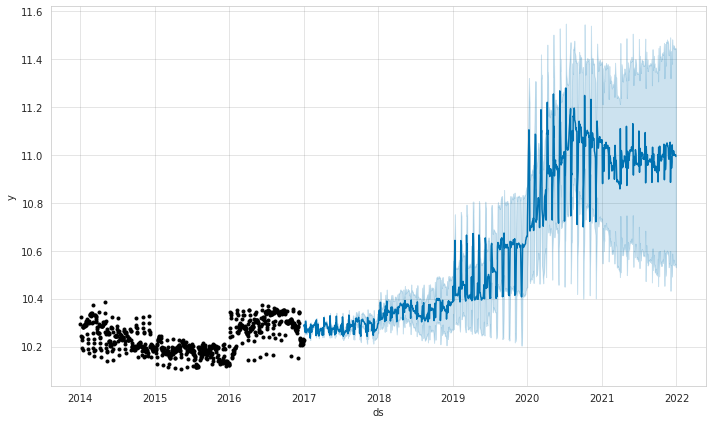

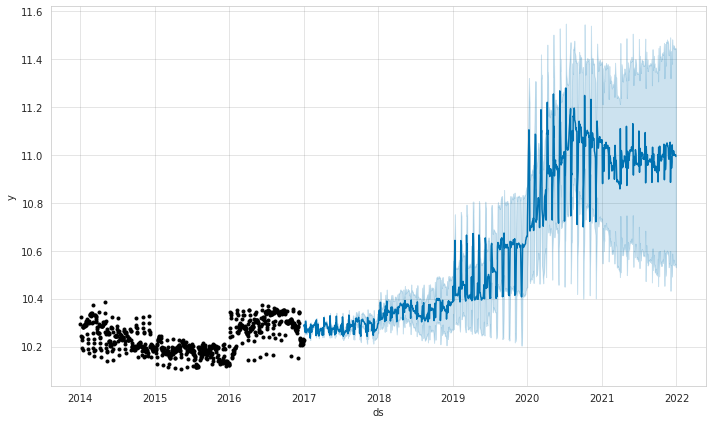

In [ ]:
model.plot(forecast_data)

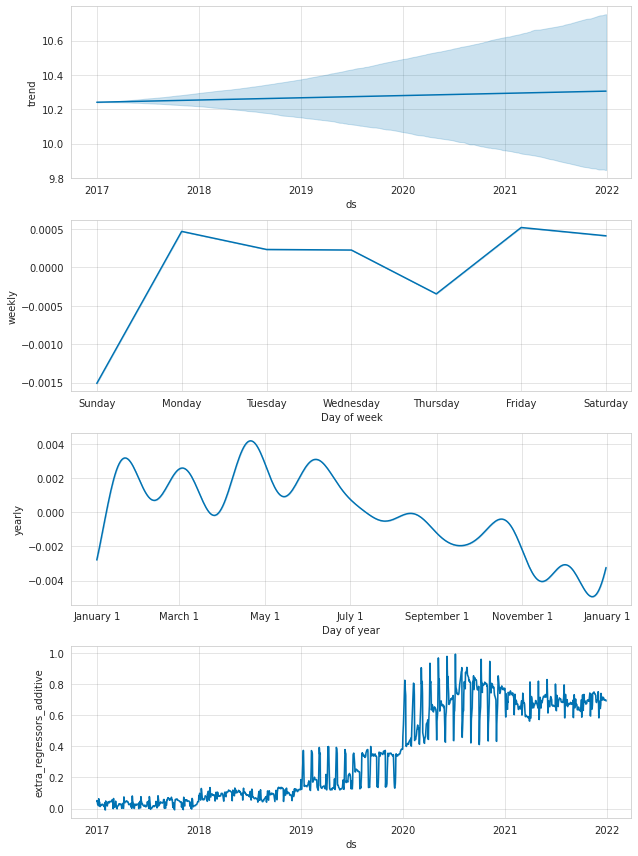

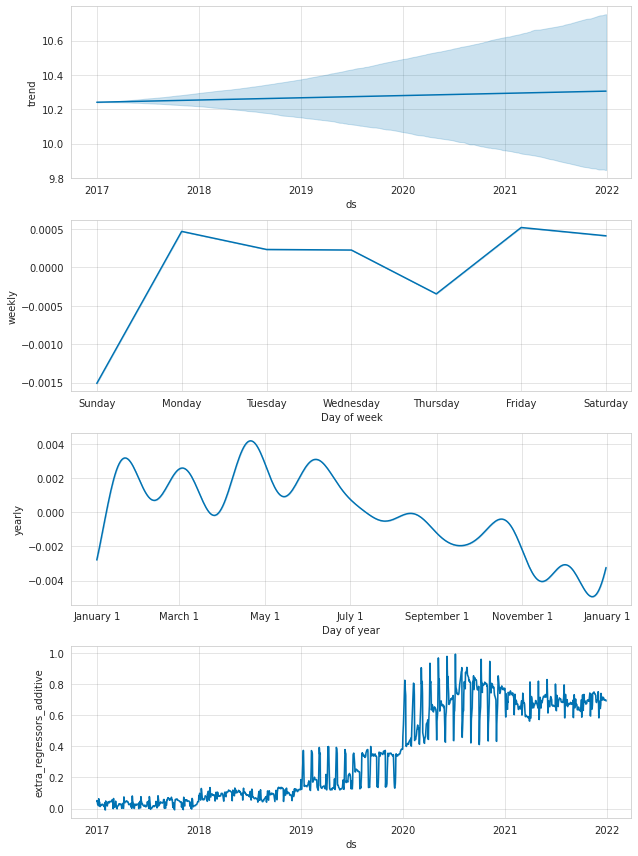

In [ ]:
model.plot_components(forecast_data)

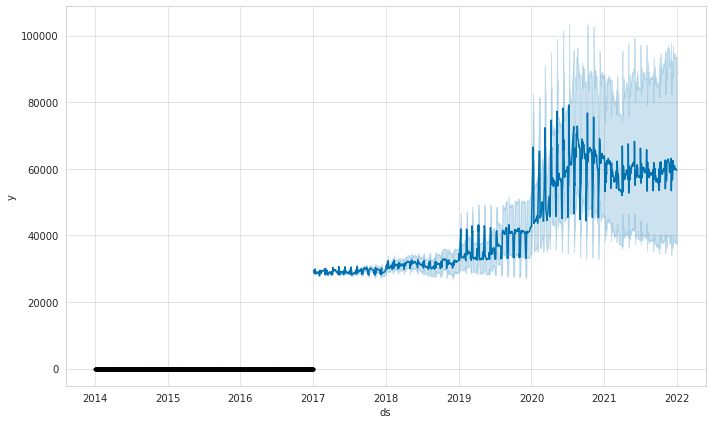

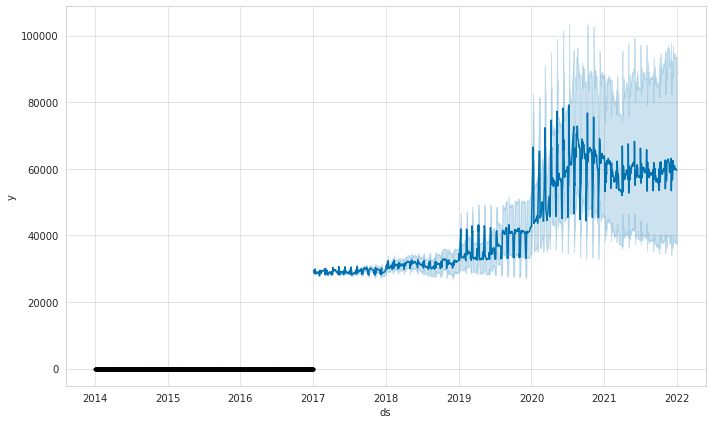

In [ ]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model.plot(forecast_data_orig)